# Cure Kinetics Model (Autocatalytic + Diffusion)
## Epoxy 8552 Resin
This model accounts for the shift from a kinetics-controlled to a diffusion controlled reaction above glass transition temperature (T_g).

<>:53: SyntaxWarning: invalid escape sequence '\p'
<>:54: SyntaxWarning: invalid escape sequence '\p'
<>:53: SyntaxWarning: invalid escape sequence '\p'
<>:54: SyntaxWarning: invalid escape sequence '\p'
C:\Users\meka1\AppData\Local\Temp\ipykernel_46308\702211713.py:53: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('Degree of Cure, $\phi$ [-]', fontsize=13, fontweight='bold', color=color_phi)
C:\Users\meka1\AppData\Local\Temp\ipykernel_46308\702211713.py:54: SyntaxWarning: invalid escape sequence '\p'
  line1 = ax1.plot(time_arr/3600, phi, color=color_phi, lw=2.5, label='Degree of Cure ($\phi$)')


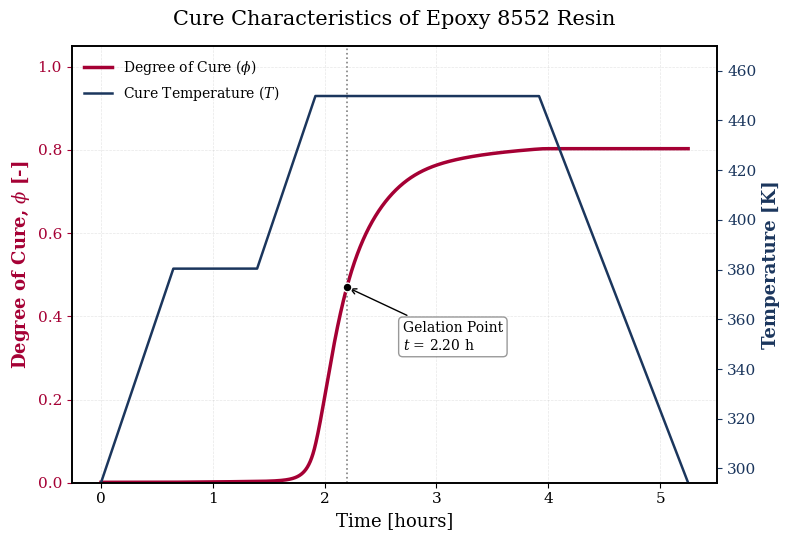

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- SETTINGS FOR JOURNAL QUALITY ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.linewidth'] = 1.2

# --- PARAMETERS ---
A1, A2, A3, A4, A5, A6, A7 = 153000.0, 66500.0, 0.813, 2.74, 43.1, -1.684, 0.005456
params = [A1, A2, A3, A4, A5, A6, A7]
phi_g = 0.47  # Gelation degree of cure  

t_cycle = np.array([0, 2325, 5025, 6900, 14100, 18900])
T_cycle = np.array([294.26, 380.37, 380.37, 449.82, 449.82, 294.26])

# --- FUNCTIONS ---
def phidot4(phi, time, p, t_pts, T_pts):
    temp = np.interp(time, t_pts, T_pts)
    k = p[0] * np.exp(-p[1] / (8.314 * temp))
    diffusion = 1 + np.exp(p[4] * (phi - (p[5] + p[6] * temp)))
    return (k * (phi**p[2]) * ((1 - phi)**p[3])) / diffusion

def rk_solver(dx, x0, y0, p, t_pts, T_pts):
    k1 = phidot4(y0, x0, p, t_pts, T_pts)
    k2 = phidot4(y0 + k1*dx/2, x0 + dx/2, p, t_pts, T_pts)
    k3 = phidot4(y0 + k2*dx/2, x0 + dx/2, p, t_pts, T_pts)
    k4 = phidot4(y0 + k3*dx, x0 + dx, p, t_pts, T_pts)
    return dx * (k1 + 2*k2 + 2*k3 + k4) / 6

# --- SIMULATION ---
time_arr = np.linspace(0, np.max(t_cycle), 10001)
dt = time_arr[1] - time_arr[0]
phi = np.zeros(len(time_arr))
phi[0] = 1e-3 

for i in range(len(time_arr) - 1):
    phi[i+1] = phi[i] + rk_solver(dt, time_arr[i], phi[i], params, t_cycle, T_cycle)

gel_idx = np.argmin(np.abs(phi - phi_g))
t_gel_hrs = time_arr[gel_idx] / 3600
T_arr = np.interp(time_arr, t_cycle, T_cycle)

# # --- PLOTTING ---
# fig, ax1 = plt.subplots(figsize=(8, 5.5))

# # Define Oxford Blue and Deep Crimson colors
# color_temp = '#1B365D'
# color_phi  = '#A50034'

# # Left Axis: Degree of Cure
# ax1.set_xlabel('Time [hours]', fontsize=13)
# ax1.set_ylabel('Degree of Cure, $\phi$ [-]', fontsize=13, fontweight='bold', color=color_phi)
# line1 = ax1.plot(time_arr/3600, phi, color=color_phi, lw=2.5, label='Degree of Cure ($\phi$)')
# ax1.set_ylim(0, 1.05)
# ax1.tick_params(axis='y', labelsize=11, labelcolor=color_phi, color=color_phi)
# ax1.tick_params(axis='x', labelsize=11)

# # Right Axis: Temperature
# ax2 = ax1.twinx()
# ax2.set_ylabel('Temperature [K]', fontsize=13, fontweight='bold', color=color_temp)
# line2 = ax2.plot(time_arr/3600, T_arr, color=color_temp, lw=1.8, linestyle='-', label='Cure Temperature ($T$)')
# ax2.set_ylim(294.26, 470)
# ax2.tick_params(axis='y', labelsize=11, labelcolor=color_temp, color=color_temp)

# # Annotate Gelation
# ax1.axvline(x=t_gel_hrs, color='gray', linestyle=':', lw=1.2)
# ax1.scatter(t_gel_hrs, phi_g, color='black', zorder=5, s=40, edgecolor='white')
# ax1.annotate(f'Gelation Point\n$t$ = {t_gel_hrs:.2f} h', 
#              xy=(t_gel_hrs, phi_g), xytext=(t_gel_hrs + 0.5, phi_g - 0.15),
#              arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
#              fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# # Legend: Removed box/frame
# lines = line1 + line2
# labels = [l.get_label() for l in lines]
# ax1.legend(lines, labels, loc='upper left', frameon=False, fontsize=10)

# plt.title('Cure Characteristics of Epoxy 8552 Resin', fontsize=15, pad=15)
# ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
# fig.tight_layout()

# plt.savefig('Epoxy8552_Cure_Final.png', dpi=600, bbox_inches='tight')
# plt.show()

# DiBendetto Equation (Glass Transition Temperature)

$$\displaystyle\frac{T_g-T_{g0}}{T_{g\infty}-T_{g0}} = \displaystyle\frac{\lambda\alpha}{1-(1-\lambda)\alpha}$$

$T_{g0} \rightarrow \text{Glass transition temperature of UNCURED resin}$

$T_{g\infty} \rightarrow \text{Glass transition temperature of CURED resin}$

$\lambda \rightarrow \text{Fitting parameter (constant)}$

|       Symbol      |                  Description                  |              Value             |
|:-----------------:|:---------------------------------------------:|:------------------------------:|
| $E_{glass}^m$     | Resin Young’s Modulus (Glassy State)          |           $4670$ MPa           |
| $\nu_{glass}^m$   | Poisson’s ratio (Glassy State)                |             $0.37$             |
| $\phi_{gel}$      | Degree of cure @ gel point                    |             $0.43$             |
| $E_{rubber}^m$    | Resin Young’s Modulus (Rubbery State)         |           $4.67$ MPa           |
| $vshtm$           | Resin volumetric shrinkage                    |            $-0.0494$           |
| $\alpha^{rubber}$ | Thermal expansion coefficient (Rubbery State) | $18.2 \times 10^{-5} K^{-1}$ |
| $\alpha^{glass}$  | Thermal expansion coefficient (Glassy State)  |   $5 \times 10^{-5} K^{-1}$  |
| $\lambda$         | Coefficient in the Debenedetto equation       |             $0.78$             |
| $T_g^0$           | $T_g$ of the uncured resin                    |           $265.15$ K           |
| $T_g^f$           | $T_g$ of the fully cured resin                |           $523.15$ K           |

<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
<>:35: SyntaxWarning: invalid escape sequence '\p'
<>:36: SyntaxWarning: invalid escape sequence '\p'
C:\Users\meka1\AppData\Local\Temp\ipykernel_46308\2587005428.py:35: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('Degree of Cure, $\phi$', fontsize=13, fontweight='bold', color=color_phi)
C:\Users\meka1\AppData\Local\Temp\ipykernel_46308\2587005428.py:36: SyntaxWarning: invalid escape sequence '\p'
  line1 = ax1.plot(time_arr/3600, phi, color=color_phi, lw=2.5, label='Degree of Cure ($\phi$)')


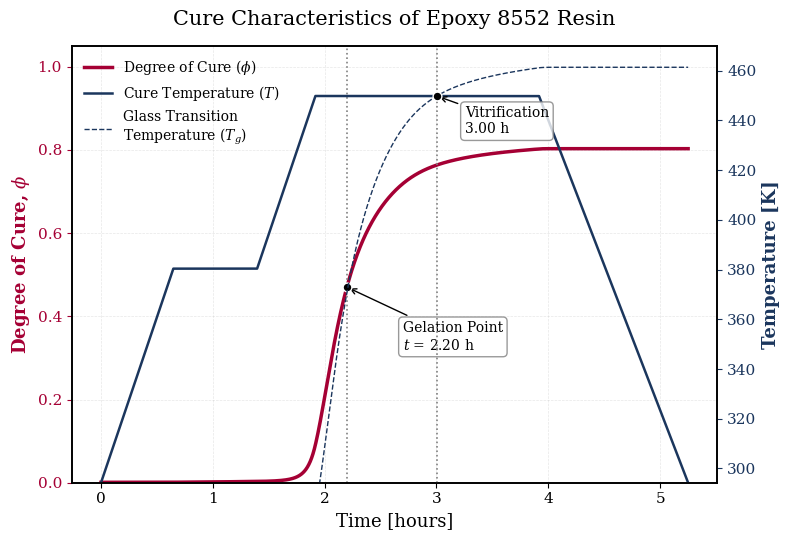

In [12]:
# Finding Glass Transition Temperature
Tg_0   = 265.15
Tg_inf = 523.15
lamb   = 0.78

Tg = np.zeros(len(time_arr))

# Finding Glass Transition Temperature (Tg) using DiBenedetto Equation
# Function of Degree or Cure (phi)
for i in range(len(time_arr)):
    Tg[i] = Tg_0 + (Tg_inf-Tg_0)*(lamb*phi[i])/(1-(1-lamb)*phi[i])


# --- FIND VITRIFICATION POINT ---
# Vitrification occurs when Tg crosses T_arr
# We find the first index where Tg >= T_arr
vit_indices = np.where(Tg >= T_arr)[0]
if len(vit_indices) > 0:
    vit_idx = vit_indices[0]
    t_vit_hrs = time_arr[vit_idx] / 3600
    Tg_vit = Tg[vit_idx]
else:
    vit_idx = None


# --- PLOTTING ---
fig, ax1 = plt.subplots(figsize=(8, 5.5))

# Define Oxford Blue and Deep Crimson colors
color_temp = '#1B365D'
color_phi  = '#A50034'

# Left Axis: Degree of Cure
ax1.set_xlabel('Time [hours]', fontsize=13)
ax1.set_ylabel('Degree of Cure, $\phi$', fontsize=13, fontweight='bold', color=color_phi)
line1 = ax1.plot(time_arr/3600, phi, color=color_phi, lw=2.5, label='Degree of Cure ($\phi$)')
ax1.set_ylim(0, 1.05)
ax1.tick_params(axis='y', labelsize=11, labelcolor=color_phi, color=color_phi)
ax1.tick_params(axis='x', labelsize=11)

# Right Axis: Temperature
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature [K]', fontsize=13, fontweight='bold', color=color_temp)
line2 = ax2.plot(time_arr/3600, T_arr, color=color_temp, lw=1.8, linestyle='-', label='Cure Temperature ($T$)')
line3 = ax2.plot(time_arr/3600, Tg, color=color_temp, lw=1, linestyle='--', label='Glass Transition\nTemperature ($T_g$)')
ax2.set_ylim(294.26, 470)
ax2.tick_params(axis='y', labelsize=11, labelcolor=color_temp, color=color_temp)

# Annotate Gelation
ax1.axvline(x=t_gel_hrs, color='gray', linestyle=':', lw=1.2)
ax1.scatter(t_gel_hrs, phi_g, color='black', zorder=5, s=40, edgecolor='white')
ax1.annotate(f'Gelation Point\n$t$ = {t_gel_hrs:.2f} h', 
             xy=(t_gel_hrs, phi_g), xytext=(t_gel_hrs + 0.5, phi_g - 0.15),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='black'),
             fontsize=10, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

# Plot Vitrification Intersection
if vit_idx is not None:
    ax2.axvline(x=t_vit_hrs, color='gray', linestyle=':', lw=1.2, label='Vitrification')
    ax2.scatter(t_vit_hrs, Tg_vit, color='black', zorder=5, s=40, edgecolor='white')
    ax2.annotate(f'Vitrification\n{t_vit_hrs:.2f} h', 
                 xy=(t_vit_hrs, Tg_vit), xytext=(t_vit_hrs + 0.25, Tg_vit - 15),
                 arrowprops=dict(arrowstyle='->', color='black'),
                 fontsize=10, bbox=dict(boxstyle="round,pad=0.3",fc="white", ec="gray", alpha=0.8))

# Legend: Removed box/frame
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', frameon=False, fontsize=10)

plt.title('Cure Characteristics of Epoxy 8552 Resin', fontsize=15, pad=15)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
fig.tight_layout()

plt.savefig('Epoxy8552_Cure_Final.png', dpi=600, bbox_inches='tight')
plt.show()

# Viscosity Model (Kenny)

doi: 

Model captures decrease in viscosity when the resin is in liquid state initially as the temperature increases, later as the degree of cure increases the resin is undergoing phase transformation to the viscosity starts to increase as the liquid is turning more into a rubber type viscoelastic material, later as we approach the gelation point the viscosity spikes up as the phase transformation is complete and now resin is in a rubbery state

<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
<>:44: SyntaxWarning: invalid escape sequence '\m'
<>:45: SyntaxWarning: invalid escape sequence '\m'
C:\Users\meka1\AppData\Local\Temp\ipykernel_46308\4227351425.py:44: SyntaxWarning: invalid escape sequence '\m'
  ax1.set_ylabel('Viscosity, $\mu$ [Pa$\cdot$s]', fontsize=13, fontweight='bold', color=color_mu)
C:\Users\meka1\AppData\Local\Temp\ipykernel_46308\4227351425.py:45: SyntaxWarning: invalid escape sequence '\m'
  line1 = ax1.semilogy(time_arr/3600, mu, color=color_mu, lw=2.5, label='Viscosity ($\mu$)')


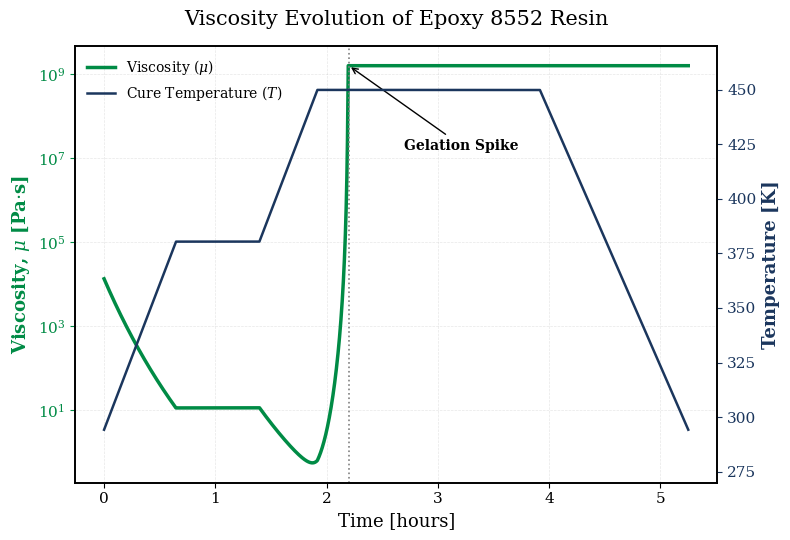

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# --- SETTINGS FOR JOURNAL QUALITY ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.linewidth'] = 1.2

# --- PARAMETERS & DATA ---
# (Assuming phi and time_arr are available from your previous cure simulation)
Emu = 76536.0   # J/mol
Amu = 3.45e-10  # Pa.s
A1 = 3.8
A2 = 2.5
phi_g = 0.47
R = 8.314

# Calculate Temperature array for the timeline
T_arr = np.interp(time_arr, t_cycle, T_cycle)
mu = np.zeros(len(time_arr))

# --- VISCOSITY CALCULATION ---
for i in range(len(time_arr)):
    if phi[i] < phi_g * 0.99:  # Using 0.99 for a sharper approach to the spike
        # Equation B.8 logic
        term1 = Amu * np.exp(Emu / (R * T_arr[i]))
        term2 = (phi_g / (phi_g - phi[i]))**(A1 + A2 * phi[i])
        mu[i] = term1 * term2
    else:
        mu[i] = mu[i-1] # Cap viscosity at gelation

# Find gelation time for annotation
gel_idx   = np.argmin(np.abs(phi - phi_g))
t_gel_hrs = time_arr[gel_idx] / 3600

# --- PLOTTING ---
fig, ax1 = plt.subplots(figsize=(8, 5.5))

color_temp = '#1B365D'   # Oxford Blue
color_mu   = '#008B45'   # Emerald Green

# Left Axis: Viscosity (Log Scale)
ax1.set_xlabel('Time [hours]', fontsize=13)
ax1.set_ylabel('Viscosity, $\mu$ [Pa$\cdot$s]', fontsize=13, fontweight='bold', color=color_mu)
line1 = ax1.semilogy(time_arr/3600, mu, color=color_mu, lw=2.5, label='Viscosity ($\mu$)')
ax1.tick_params(axis='y', labelsize=11, labelcolor=color_mu, color=color_mu)
ax1.tick_params(axis='x', labelsize=11)

# Right Axis: Temperature (Linear Scale)
ax2 = ax1.twinx()
ax2.set_ylabel('Temperature [K]', fontsize=13, fontweight='bold', color=color_temp)
line2 = ax2.plot(time_arr/3600, T_arr, color=color_temp, lw=1.8, linestyle='-', label='Cure Temperature ($T$)')
ax2.set_ylim(270, 470)
ax2.tick_params(axis='y', labelsize=11, labelcolor=color_temp, color=color_temp)

# Annotate the "Viscosity Spike" / Gelation
ax1.axvline(x=t_gel_hrs, color='gray', linestyle=':', lw=1.2)
ax1.annotate('Gelation Spike', 
             xy=(t_gel_hrs, mu[gel_idx-10]), xytext=(t_gel_hrs + 0.5, mu[gel_idx-10]/100),
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=10, fontweight='bold')

# Legend: Frame removed
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', frameon=False, fontsize=10)

plt.title('Viscosity Evolution of Epoxy 8552 Resin', fontsize=15, pad=15)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)
fig.tight_layout()

# Save for publication
plt.savefig('Epoxy8552_Viscosity_Journal.png', dpi=600, bbox_inches='tight')
plt.show()

# CHILE model

Cure Hardening Instantaneously Linear Elastic model, the stiffness of the resin depends on the degree of cure ($\phi$).

The cure dependent resin modulus ($E_r$) can be determined by dividing the curing process into three distinct regions.

First  - Pre-Gelation Stage (Liquid Stage)

Second - Gelation Stage (Rubbery Stage)

Third  - Glassy Stage 

In the first and third region the resin modulus is a CONSTANT. 

In the first stage is resin assumed to be fully UNCURED, and assumed to behave like a viscous fluid. 

In the second stage, the stiffness of resin increases significantly and the specific volume of the resin decreases due to chemical shrinkage.

In the third stage, no further chemical shrinkage occurs.




### Epoxy 8552 Resin Modulus Parameters

| **Parameter**  | **Description**              | **Initial Value** |
|----------------|------------------------------|:-----------------:|
| $E_r^0$        | Initial Modulus              |      $4.67$ MPa   |
| $E_r^{\infty}$ | Final Modulus                |       $4670$ MPa  |
| $T_{C1}$       | Start Transition Temperature | * computed *      |
| $T_{C2}$       | End Transition Temperature   | * computed *      |

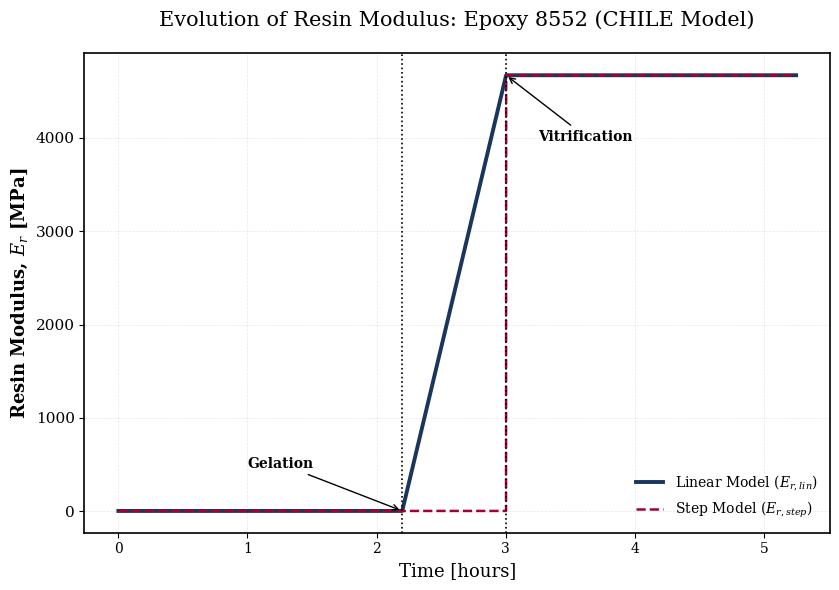

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# --- SETTINGS FOR JOURNAL QUALITY ---
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['axes.linewidth'] = 1.2

# --- DATA PREPARATION (Assuming phi, time_arr, T_arr are pre-calculated) ---
# Parameters from COMPRO / Mechanical Properties Table
Er_infty = 4670.0  # MPa (Glassy)
Er_0     = 4.67    # MPa (Rubbery)

# Resin Modulus Calculation (Linear Increase between Gelation and Vitrification)
# --- MODULUS CALCULATION ---
Er_linear                    = np.full(len(time_arr), Er_0)
Er_linear[gel_idx:vit_idx+1] = Er_0 + (Er_infty - Er_0)*((time_arr[gel_idx:vit_idx+1]-time_arr[gel_idx])/(time_arr[vit_idx]-time_arr[gel_idx]))
Er_linear[vit_idx+1:]        = Er_infty


# Resin Modulus Calculation (Step Change at Vitrification)
# --- MODULUS CALCULATION ---
Er_step                    = np.full(len(time_arr), Er_0)
Er_step[vit_idx+1:]        = Er_infty


# --- PLOTTING ---
fig, ax1 = plt.subplots(figsize=(8.5, 6))

# Define Professional Color Palette
color_blue    = '#1B365D'   # Oxford Blue (Primary Data)
color_grey    = '#2F4F4F'   # Slate Grey (Comparison)
color_crimson = '#A50034'   # Deep Crimson (Context)

# Primary Axis: Resin Modulus
ax1.set_xlabel('Time [hours]', fontsize=13)
ax1.set_ylabel('Resin Modulus, $E_r$ [MPa]', fontsize=13, fontweight='bold')
line1 = ax1.plot(time_arr/3600, Er_linear, color=color_blue, lw=2.8, label='Linear Model ($E_{r,lin}$)')
line2 = ax1.plot(time_arr/3600, Er_step, color=color_crimson, lw=1.8, linestyle='--', label='Step Model ($E_{r,step}$)')

# Formatting Primary Axis
ax1.tick_params(axis='y', labelsize=11)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

# Annotate Key Points
# Gelation Line
ax1.axvline(x=t_gel_hrs, color='black', linestyle=':', lw=1.2)
ax1.annotate('Gelation', xy=(t_gel_hrs, Er_0), xytext=(t_gel_hrs - 1.2, Er_0*100),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10, fontweight='bold')

# Vitrification Line
ax1.axvline(x=t_vit_hrs, color='black', linestyle=':', lw=1.2)
ax1.annotate('Vitrification', xy=(t_vit_hrs, Er_infty), xytext=(t_vit_hrs + 0.25, Er_infty*0.85),
             arrowprops=dict(arrowstyle='->', color='black'), fontsize=10, fontweight='bold')

# Legend (Unified and frameless)
lines = line1 + line2 
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='lower right', frameon=False, fontsize=10)

plt.title('Evolution of Resin Modulus: Epoxy 8552 (CHILE Model)', fontsize=15, pad=20)
fig.tight_layout()

# Save for Publication
plt.savefig('Epoxy8552_Modulus_Publication.png', dpi=600, bbox_inches='tight')
plt.show()

In [16]:
time_arr[gel_idx]

7915.32

Reference:  Johnston A (1997) An integrated model of the development of process-induced deformation in autoclave processing of composite structures. Ph.D. thesis, The University of British Columbia
https://www.researchgate.net/publication/253529873_An_Integrated_Model_of_the_Development_of_Process-Induced_Deformation_in_Autoclave_Processing_of_Composite_Structures

|  **Parameter** |           **Value**           |                      **Comments**                      |
|:--------------:|:-----------------------------:|:------------------------------------------------------:|
| $E_r^{\infty}$ | $4670 \text{ MPa}$ |        Unrelaxed resin modulus at $t=0$ (or $T \ll T_g$)  and T=20 Celsius|
| $E_r^0$        | $4.67 \text{ MPa}$ |     Relaxed resin modulus at $t=\infty$ (or $T \gg T_g$) and T=20 Celsius. This value is actually a high function of degree of cure|
| $T_{C1a}$      |       $-45.7 \text{ K}$       |        Prior to $T_{C1}$, $E_r=E_r^0$ |
| $T_{C1b}$      |             $0.0$             | Variation of lower critical value for $T^*$ with temp. |
| $T_{C2}$       |        $-12 \text{ K}$        |                         After $T_{C2}$, $E_r=E_r^{\infty}$  |
| $T_g^0$        |        $268 \text{ K}$        |             Glass transition temperature at $\alpha=0$ |
| $a_{Tg}$       |        $220 \text{ K}$        |    Variation of glass transition temp. with $\alpha=0$ |
| $T_0$          | $20 \text{ }^{\circ}\text{C}$ |         Zero point temperature for secondary variation of $E_r$ with temperature|
| $a_{Er}$       |              $0$              |       Relative secondary variation of $E_r$ with temp. |

<>:46: SyntaxWarning: invalid escape sequence '\p'
<>:46: SyntaxWarning: invalid escape sequence '\p'
C:\Users\meka1\AppData\Local\Temp\ipykernel_46308\4202857014.py:46: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_xlabel('Degree of Cure $\phi$', fontsize=13)


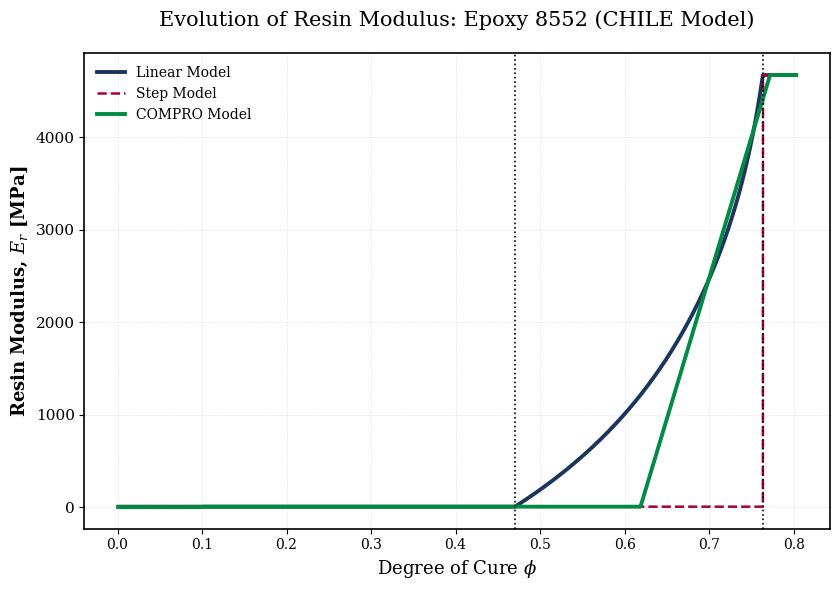

In [22]:
## Using the COMPRO model 

a_Er  = 0
T_0   = 20 + 273.15
TC1a  = -45.7
TC1b  = 0
TC2   = -12
aTg   = 220
Tg0   = 268

# ! NOT - Tg calculation done according DiBendetto Equation 


# Linear Relationship Tg vs phi
Tg = (Tg0 + aTg*phi)

T_star = Tg-T_arr 

T_starC1 = TC1a + TC1b*T_arr
T_starC2 = TC2

Er_COMPRO = np.zeros(len(time_arr)) 

for i in range(len(time_arr)):
    if phi[i] < 0.1:
        Er_dash = Er_0 #hard code the initial modulus to skip the anomaly
        continue
    if T_star[i] <= T_starC1[i]:
        Er_dash = Er_0
    elif T_starC1[i] < T_star[i] <= T_starC2:
        Er_dash = Er_0 +(Er_infty-Er_0)*(T_star[i]-T_starC1[i])/(T_starC2-T_starC1[i])
    else:
        Er_dash = Er_infty
    Er_COMPRO[i] = Er_dash*(1 + a_Er*(T_arr[i]-T_0))


# --- PLOTTING ---
fig, ax1 = plt.subplots(figsize=(8.5, 6))

# Define Professional Color Palette
color_blue    = '#1B365D'   # Oxford Blue (Primary Data)
color_grey    = '#2F4F4F'   # Slate Grey (Comparison)
color_crimson = '#A50034'   # Deep Crimson (Context)

# Primary Axis: Resin Modulus
ax1.set_xlabel('Degree of Cure $\phi$', fontsize=13)
ax1.set_ylabel('Resin Modulus, $E_r$ [MPa]', fontsize=13, fontweight='bold')

line1 = ax1.plot(phi, Er_linear, color=color_blue, lw=2.8, label='Linear Model')
line2 = ax1.plot(phi, Er_step, color=color_crimson, lw=1.8, linestyle='--', label='Step Model')
line3 = ax1.plot(phi, Er_COMPRO, color=color_mu, lw=2.8, linestyle='-', label='COMPRO Model')

# Formatting Primary Axis
ax1.tick_params(axis='y', labelsize=11)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

# Annotate Key Points
# Gelation Line
ax1.axvline(x=phi[gel_idx], color='black', linestyle=':', lw=1.2)

# Vitrification Line
ax1.axvline(x=phi[vit_idx], color='black', linestyle=':', lw=1.2)

# Legend (Unified and frameless)
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', frameon=False, fontsize=10)

plt.title('Evolution of Resin Modulus: Epoxy 8552 (CHILE Model)', fontsize=15, pad=20)
fig.tight_layout()

# Save for Publication
plt.savefig('Epoxy8552_Modulus_Publication.png', dpi=600, bbox_inches='tight')
plt.show()

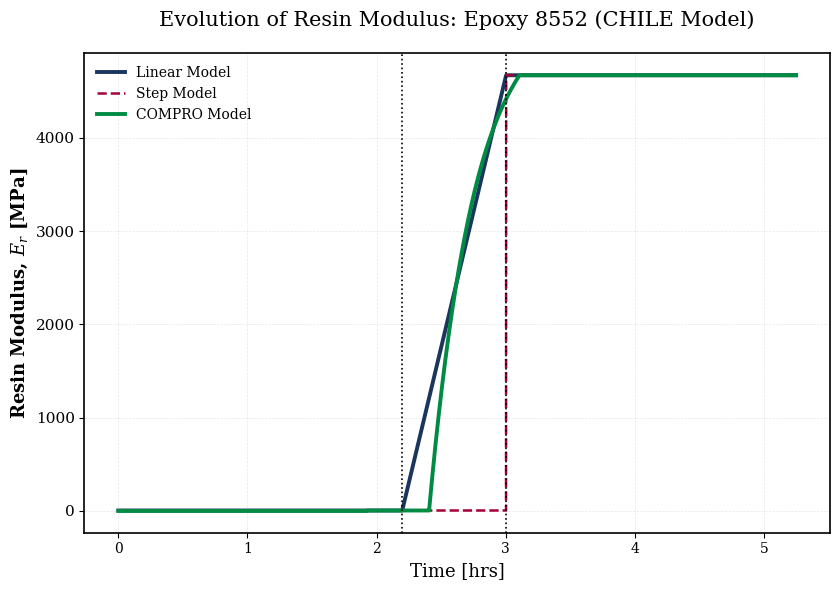

In [23]:
# --- PLOTTING ---
fig, ax1 = plt.subplots(figsize=(8.5, 6))

# Define Professional Color Palette
color_blue    = '#1B365D'   # Oxford Blue (Primary Data)
color_grey    = '#2F4F4F'   # Slate Grey (Comparison)
color_crimson = '#A50034'   # Deep Crimson (Context)

# Primary Axis: Resin Modulus
ax1.set_xlabel('Time [hrs]', fontsize=13)
ax1.set_ylabel('Resin Modulus, $E_r$ [MPa]', fontsize=13, fontweight='bold')
line1 = ax1.plot(time_arr/3600, Er_linear, color=color_blue, lw=2.8, label='Linear Model')
line2 = ax1.plot(time_arr/3600, Er_step, color=color_crimson, lw=1.8, linestyle='--', label='Step Model')
line3 = ax1.plot(time_arr/3600, Er_COMPRO, color=color_mu, lw=2.8, linestyle='-', label='COMPRO Model')


# Formatting Primary Axis
ax1.tick_params(axis='y', labelsize=11)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.3)

# Annotate Key Points
# Gelation Line
ax1.axvline(x=t_gel_hrs, color='black', linestyle=':', lw=1.2)

# Vitrification Line
ax1.axvline(x=t_vit_hrs, color='black', linestyle=':', lw=1.2)

# Legend (Unified and frameless)
lines = line1 + line2 + line3
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', frameon=False, fontsize=10)

plt.title('Evolution of Resin Modulus: Epoxy 8552 (CHILE Model)', fontsize=15, pad=20)
fig.tight_layout()

# Save for Publication
plt.savefig('Epoxy8552_Modulus_Publication.png', dpi=600, bbox_inches='tight')
plt.show()